# Template notebook

It's good to start with an introduction, to set the scene and introduce your audience to the data, and the problem you're solving as a team.

<br>

## Libraries
As always, we'll start by importing the necessary libraries.

In [1]:
# !pip install numpy pandas matplotlib seaborn ipykernel plotly nbformat scikit-learn lightgbm

After installation, it is necessary to restart the kernel.

In [2]:
# It's good practice to add comments to explain your code 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

**Question / Task 1**

Insert context about question / task 1 here.

### The problem

In [3]:
# Add your code here
df = pd.read_csv("data/corona_tested_individuals_ver_006.english.csv")

D:\tmp\ipykernel_18200\2055522835.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/corona_tested_individuals_ver_006.english.csv")


In [4]:
df["test_indication"].value_counts()

test_indication
Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: count, dtype: int64

### Description of the Dataset

The dataset consists of the following features for COVID-19 test records:

* **`test_date`**: The date when the test was conducted.
* **`cough`**: Binary value indicating the presence (1) or absence (0) of a cough.
* **`fever`**: Binary value indicating the presence (1) or absence (0) of a fever.
* **`sore_throat`**: Binary value indicating the presence (1) or absence (0) of a sore throat.
* **`shortness_of_breath`**: Binary value indicating the presence (1) or absence (0) of shortness of breath.
* **`head_ache`**: Binary value indicating the presence (1) or absence (0) of a headache.
* **`corona_result`**: The result of the COVID-19 test, which can be 'negative', 'positive', or possibly 'other'.

<details style="padding-left: 3rem">
    <summary>more details</summary>
    <p>In the context of COVID-19 test results, the category "other" typically represents test outcomes that do not fall neatly into the binary categories of "negative" or "positive." Here are some possible meanings for "other":</p>
    <p>Indeterminate or Inconclusive: The test result was neither clearly positive nor negative. This can happen if the test sample was insufficient or contaminated.
    Pending: The test result has not yet been finalized or reported.
    Invalid: The test was not conducted properly, or there was an error in the testing process, leading to an invalid result.
    Recovered: In some datasets, individuals who have previously tested positive and are now considered recovered may be categorized separately.
    Understanding the exact meaning of "other" would require more detailed documentation or metadata from the dataset provider.</p>

</details>

* **`age_60_and_above`**: Indicator of whether the individual is aged 60 or above ('Yes', 'No'), with some missing values (NaN).
* **`gender`**: The gender of the individual ('male' or 'female').
* **`test_indication`**: The reason for taking the test, categorized as 'Contact with confirmed', 'Abroad', or 'Other'.

The dataset captures various symptoms and demographic information along with COVID-19 test results, which can be used for exploratory data analysis and model building to predict COVID-19 test outcomes based on symptoms and other features.

In [5]:
df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
1,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
2,2020-04-30,0.0,1.0,0.0,0.0,0.0,negative,NaN,male,Other
3,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
4,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other


In [6]:
df.describe()

,cough,fever,sore_throat,shortness_of_breath,head_ache
count,278596.000000,278596.000000,278847.000000,278847.000000,278847.000000
mean,0.151574,0.078077,0.006907,0.005655,0.008657
std,0.358608,0.268294,0.082821,0.074990,0.092640
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   test_date            278848 non-null  object 
 1   cough                278596 non-null  float64
 2   fever                278596 non-null  float64
 3   sore_throat          278847 non-null  float64
 4   shortness_of_breath  278847 non-null  float64
 5   head_ache            278847 non-null  float64
 6   corona_result        278848 non-null  object 
 7   age_60_and_above     151528 non-null  object 
 8   gender               259285 non-null  object 
 9   test_indication      278848 non-null  object 
dtypes: float64(5), object(5)
memory usage: 21.3+ MB


In [8]:
df["gender"].value_counts()

gender
female    130158
male      129127
Name: count, dtype: int64

In [9]:
df["corona_result"].value_counts()

corona_result
negative    260227
positive     14729
other         3892
Name: count, dtype: int64

In [10]:
df["test_indication"].value_counts()

test_indication
Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: count, dtype: int64

## Exploratory Data Analysis

### 1. About possible biases and limitations of this dataset

##### Data Collection Method

* **Source of Data**: The data is collected from a specific region, demographic, or population group, it might not be representative of the entire population. 
These data was collected on of all individuals in Israel tested for SARS-CoV-2 during the first months of the COVID-19 pandemic.
* **Testing Access**: Individuals who have better access to healthcare facilities are more likely to get tested, which can lead to a selection bias.
* **Symptom Reporting**: Self-reported symptoms can introduce bias due to underreporting or overreporting of symptoms. People might not report mild symptoms or may misreport symptoms due to fear or misunderstanding.

##### Missing Data

* **`age_60_and_above`**: about 60% of data is missing. Missing data can introduce bias if the missingness is not random and is related to other variables in the dataset.

##### Feature Values

* **Binary Representation of Symptoms**: The symptoms are represented as binary (0 or 1), which does not capture the severity of the symptoms. This simplification can lead to loss of information.
* **`test_date`**: The dataset includes a `test_date`, but the relevance of this date to the onset of symptoms or to other temporal factors isn't clear.


#### Target Variable (corona_result):

* **Class Imbalance**: The dataset has a significant imbalance in the target variable (e.g., many more negative cases than positive cases), it can affect model performance and evaluation metrics.

#### External Factors

* **Temporal Changes**: The spread and detection of COVID-19 can change over time due to various factors like new variants, public health measures, and vaccination rates. If the data spans a long time period, these temporal changes can introduce bias.
* **Behavioral Changes**: Changes in public behavior, such as mask-wearing and social distancing, can influence the likelihood of reporting certain symptoms and testing positive.

In [11]:
df["test_indication"].value_counts()

test_indication
Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: count, dtype: int64

### 2. Format of Feature Values

| Feature | Type | Format | Missing values |
| :------ |:---- | :----- |:------- |
| **`test_date`** | Date string | "YYYY-MM-DD", "2020-04-30" | 0 |
| **`cough`** | Binary (Numeric) | 0.0 or 1.0 | 252 |
| **`fever`** | Binary (Numeric) | 0.0 or 1.0 | 252 |
| **`sore_throat`** | Binary (Numeric) | 0.0 or 1.0 | 0 |
| **`shortness_of_breath`** | Binary (Numeric) | 0.0 or 1.0 | 1 |
| **`head_ache`** | Binary (Numeric) | 0.0 or 1.0 | 1 |
| **`corona_result`** | Categorical (String) | "negative", "positive", or "other"  | 0 |
| **`age_60_and_above`** | Categorical (String) with missing values | "Yes", "No", or NaN  | 127,320 |
| **`gender`** | Categorical (String) | "male" or "female"  | 19,563 |
| **`test_indication`** | Categorical (String) | "Contact with confirmed", "Abroad", or "Other"  | 0 |

### 3. The statistics of feature values

There are `278,848` entries in the dataset for all features.

#### 3.1`test_date`

##### Interpretation

* **Non-null Entries**: All entries are non-null, indicating that every record has a test date.
* **Data Type**: The `test_date` is currently stored as an object (string), though it could be converted to a datetime type for more effective date-based operations and analysis.
* **Frequency**: The highest number of tests was conducted on `2020-04-20` (10,921 tests) and the lowest on `2020-03-11` (294 tests).

In [12]:
test_date_counts = df["test_date"].value_counts().sort_index()
# test_date_counts.plot()
fig = px.line(
    test_date_counts, 
    x=test_date_counts.index,
    y=test_date_counts.values,
    title="Number of Tests Over Time",
    labels={"index": "Test Date", "y": "Number of Tests"}
)
fig.update_xaxes(tickangle=45)
fig.show()

#### 3.2`cough`

- **Missing values**: There are `252` missing values for the `cough` feature.
- **Value Counts**:
  - `0.0`: Reported in `236,368` instances.
  - `1.0`: Reported in `42,228` instances.
- **Prevalence**: Cough is reported in approximately `15.1%` of the total cases.
- **Data Type Consideration**: `cough` is stored as a float64 (`0.0` and `1.0`), representing binary presence (`1.0`) or absence (`0.0`) of cough.

In [13]:
value_counts = df["cough"].value_counts()
value_counts[0]

np.int64(236368)

In [14]:
def pie_value_count(feature, label=None):
    value_counts = df[feature].value_counts()
    missing = df[feature].isna().sum()
    value_counts["missing"] = missing
    if not label:
        label = value_counts.index.map({
            0.0: f"No {feature}: {value_counts.iloc[0]:,}", 
            1.0: f"{feature}: {value_counts.iloc[1]:,}", 
            "missing": f"missing: {missing}"
        })
    else:
        label = value_counts.index.map({
            key: f"{key}: {value_counts[key]:,}" for key in value_counts.keys()
        })
    print(label)
    data_for_pie = pd.DataFrame({
        'value_counts': value_counts.values,
        'status': label,
        "missing": value_counts["missing"]
    })
    
    fig = px.pie(
        data_for_pie,
        values="value_counts",
        names="status",
        title=f"Distribution of {feature} Feature"
    )
    fig.update_layout(
        title_x=0.5
    )
    fig.show()

pie_value_count("cough")

Index(['No cough: 236,368', 'cough: 42,228', 'missing: 252'], dtype='object', name='cough')


#### 3.3`fever`

- **Missing values**: There are `252` missing values.
- **Value Counts**:
  - `0.0`: Reported in `256,844` instances.
  - `1.0`: Reported in `21,752` instances.
- **Prevalence**: Fever is reported in approximately `7.8%` of the total cases.
- **Data Type Consideration**: `fever` is stored as a float64(`0.0` and `1.0`), representing binary presence (`1.0`) or absence (`0.0`) of fever.

In [15]:
pie_value_count("fever")

Index(['No fever: 256,844', 'fever: 21,752', 'missing: 252'], dtype='object', name='fever')


#### 3.4 `sore_throat`

- **Missing values**: There are no missing values.
- **Value Counts**:
  - `0.0`: Reported in `276,921` instances.
  - `1.0`: Reported in `1,926` instances.
- **Prevalence**: Sore throat is reported in approximately `0.7%` of the total cases (`1,926 / 278,848`).
- **Data Type Consideration**: `sore_throat` is stored as a float64 (`0.0` and `1.0`), representing binary presence (`1.0`) or absence (`0.0`) of sore throat.


In [16]:
pie_value_count("sore_throat")

Index(['No sore_throat: 276,921', 'sore_throat: 1,926', 'missing: 1'], dtype='object', name='sore_throat')


#### 3.5 `shortness_of_breath`

- **Missing values**: There is `1` missing value.
- **Value Counts**:
  - `0.0`: Reported in `277,270` instances.
  - `1.0`: Reported in `1,577` instances.
- **Prevalence**: Shortness of breath is reported in approximately `0.6%` of the total cases (`1,577 / 278,848`).
- **Data Type Consideration**: `shortness_of_breath` is stored as a float64 (`0.0` and `1.0`), representing binary presence (`1.0`) or absence (`0.0`) of shortness of breath.


In [17]:
pie_value_count("shortness_of_breath")

Index(['No shortness_of_breath: 277,270', 'shortness_of_breath: 1,577',
       'missing: 1'],
      dtype='object', name='shortness_of_breath')


#### 3.6 `head_ache`

- **Missing values**: There is `1` missing value.
- **Value Counts**:
  - `0.0`: Reported in `276,433` instances.
  - `1.0`: Reported in `2,414` instances.
- **Prevalence**: Headache is reported in approximately `0.9%` of the total cases (`2,414 / 278,848`).
- **Data Type Consideration**: `head_ache` is stored as a float64 (`0.0` and `1.0`), representing binary presence (`1.0`) or absence (`0.0`) of headache.


In [18]:
pie_value_count("head_ache")

Index(['No head_ache: 276,433', 'head_ache: 2,414', 'missing: 1'], dtype='object', name='head_ache')


#### 3.7 `corona_result`

- **Missing values**: There are no missing values.
- **Value Counts**:
  - `negative`: Reported in `260,227` instances.
  - `positive`: Reported in `14,729` instances.
  - `other`: Reported in `3,892` instances.
- **Distribution**:
  - `negative`: Approximately `93.3%`.
  - `positive`: Approximately `5.3%`.
  - `other`: Approximately `1.4%`.
- **Data Type Consideration**: `corona_result` is stored as an object (string), indicating the test result categories (`negative`, `positive`, `other`).


In [19]:
pie_value_count("corona_result", label=True)

Index(['negative: 260,227', 'positive: 14,729', 'other: 3,892', 'missing: 0'], dtype='object', name='corona_result')


#### 3.8 `age_60_and_above`

- **Missing values**: There are `127,320` missing values.
- **Value Counts**:
  - `No`: Reported in `125,703` instances.
  - `Yes`: Reported in `25,825` instances.
- **Distribution**:
  - `No`: Approximately `83.0%`.
  - `Yes`: Approximately `17.0%`.
- **Data Type Consideration**: `age_60_and_above` is stored as an object (string), indicating binary categories (`No` and `Yes`) for age above 60 years.


In [20]:
pie_value_count("age_60_and_above", label=True)

Index(['No: 125,703', 'Yes: 25,825', 'missing: 127,320'], dtype='object', name='age_60_and_above')


#### 3.9 `gender`

- **Missing values**: There are `19,563` missing values.
- **Value Counts**:
  - `female`: Reported in `130,158` instances.
  - `male`: Reported in `129,127` instances.
- **Distribution**:
  - `female`: Approximately `50.2%`.
  - `male`: Approximately `49.8%`.
- **Data Type Consideration**: `gender` is stored as an object (string), indicating binary categories (`female` and `male`) for gender.


In [21]:
pie_value_count("gender", label=True)

Index(['female: 130,158', 'male: 129,127', 'missing: 19,563'], dtype='object', name='gender')


### 3.10 `test_indication`

- **Missing values**: There are `0` missing values.
- **Value Counts**:
  - `Other`: Reported in `242,741` instances.
  - `Abroad`: Reported in `25,468` instances.
  - `Contact with confirmed`: Reported in `10,639` instances.
- **Data Type Consideration**: `test_indication` is stored as an object (string), categorizing reasons for COVID-19 testing.

In [22]:
pie_value_count("test_indication", label=True)

Index(['Other: 242,741', 'Abroad: 25,468', 'Contact with confirmed: 10,639',
       'missing: 0'],
      dtype='object', name='test_indication')


### 4. Features grouped by the target class

First, map all categorical features to binary number

In [23]:
df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
1,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
2,2020-04-30,0.0,1.0,0.0,0.0,0.0,negative,NaN,male,Other
3,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
4,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other


In [24]:
df["test_indication"].value_counts()

test_indication
Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: count, dtype: int64

In [25]:
def filter(df):
    df_filtered = df[df["corona_result"] != "other"]

    df_filtered = df_filtered.drop(columns=["test_date", "age_60_and_above"])
    
    # df_filtered["age_60_and_above"] = df_filtered["age_60_and_above"].map({
    #     "No": 0, 
    #     "Yes": 1,
    # })
    # df_filtered["age_60_and_above"] = df_filtered["age_60_and_above"].fillna(2)

    df_filtered["corona_result"] = df["corona_result"].map({
        "negative": 0, 
        "positive": 1
    })
    df_filtered["gender"] = df["gender"].map({
        "male": 0, 
        "female": 1
    })
    df_filtered["test_indication"] = df["test_indication"].map({
        "Other": 1, 
        "Abroad": 2,
        "Contact with confirmed": 3
    })
    df_filtered = df_filtered.dropna().astype(int)
    return df_filtered

In [26]:
df_filtered = filter(df)

In [27]:
from sklearn.utils import resample

def upsampling(df):
    df_negative = df[df["corona_result"] == 0]
    df_positive = df[df["corona_result"] == 1]
    
    # Upsample minority class (positive)
    df_positive_upsampled = resample(
        df_positive, 
        replace=True, 
        n_samples=len(df_negative),  
        random_state=42
    )
    df_balanced = pd.concat([df_negative, df_positive_upsampled])
    return df_balanced

In [28]:
df_filtered["corona_result"].value_counts()

corona_result
0    242136
1     13532
Name: count, dtype: int64

In [29]:
# df_filtered = upsampling(df_filtered)
df_filtered["corona_result"].value_counts()

corona_result
0    242136
1     13532
Name: count, dtype: int64

In [30]:
# drop null
df_filtered.isna().sum()

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
gender                 0
test_indication        0
dtype: int64

In [31]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255668 entries, 0 to 265120
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   cough                255668 non-null  int64
 1   fever                255668 non-null  int64
 2   sore_throat          255668 non-null  int64
 3   shortness_of_breath  255668 non-null  int64
 4   head_ache            255668 non-null  int64
 5   corona_result        255668 non-null  int64
 6   gender               255668 non-null  int64
 7   test_indication      255668 non-null  int64
dtypes: int64(8)
memory usage: 17.6 MB


In [32]:
grouped = df_filtered.groupby('corona_result').sum().transpose()
fig = px.bar(
    grouped,
    text_auto='.2s',
    title="Features Count for Corona Result"
)
fig.update_xaxes(title_text='Feature')
fig.update_yaxes(title_text='Count')
# Set barmode to 'group' for side-by-side bars
fig.update_layout(
    barmode='group',
    title_x=0.5
)
# Map legend labels
# Update trace names (legend labels)
fig.update_traces(
    name="negative",  # For corona_result 0
    selector={"name": "0"}
)
fig.update_traces(
    name="positive",  # For corona_result 1
    selector={"name": "1"}
)
fig.show()

In [33]:
df_filtered

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,gender,test_indication
0,0,0,0,0,0,0,1,1
1,1,0,0,0,0,0,1,1
2,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,1,1
4,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
265116,1,1,0,0,0,0,1,2
265117,1,1,1,0,1,0,1,2
265118,1,0,0,0,0,0,1,2
265119,1,0,0,0,0,0,0,1


## Feature engineering

In [34]:
df_filtered.describe()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,gender,test_indication
count,255668.000000,255668.000000,255668.000000,255668.000000,255668.000000,255668.000000,255668.000000,255668.000000
mean,0.152745,0.077655,0.005851,0.004216,0.008226,0.052928,0.502265,1.166212
std,0.359742,0.267629,0.076270,0.064797,0.090321,0.223890,0.499996,0.462200
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [35]:
def dummy(df):
    df_dummies = pd.get_dummies(
        df, 
        columns=['test_indication'],
        drop_first=True,
        dtype=int
    )
    df_dummies.rename(
        columns={'test_indication_2': 'test_indication_Abroad', 'test_indication_3': 'test_indication_Contact with confirmed'}, 
        inplace=True
    )
    return df_dummies

In [36]:
df_dummies = dummy(df_filtered)
df_dummies.sample(10)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,gender,test_indication_Abroad,test_indication_Contact with confirmed
156348,1,1,1,1,0,1,1,0,1
178343,0,0,0,0,0,0,0,0,0
194630,0,0,0,0,0,0,0,0,0
205212,0,0,0,0,0,0,1,0,0
32218,0,0,0,0,0,0,1,0,0
198033,0,0,0,0,0,0,1,0,0
262718,1,0,0,0,0,0,0,0,0
143687,0,0,0,0,0,0,0,0,0
231935,0,0,0,0,0,0,0,0,0
217359,0,0,0,0,0,0,0,0,0


In [37]:
X = df_dummies.drop(columns=["corona_result"])
y = df_dummies["corona_result"]

## Models

### Base model

In [38]:
def plot_cf_matrix(matrix, title=""):
    fig = px.imshow(
        matrix,
        text_auto=True,
        labels={
            "x": "Predicted Label",
            "y": "Actual Label",
            "color": "Count"
        },
        x=["Negative", "Positive"],
        y=["Negative", "Positive"],
        title=title
    )
    for i in range(2):
        fig.add_shape(type="line", x0=0.5 + i, y0=-0.5, x1=0.5 + i, y1=2 - 0.5, line=dict(color="white", width=2))
        fig.add_shape(type="line", x0=-0.5, y0=0.5 + i, x1=2 - 0.5, y1=0.5 + i, line=dict(color="white", width=2))

    fig.update_layout(title_x=0.5)
    fig.show()
    
def plot_roc_auc(true, pred_proba, title=""):
    roc_auc = roc_auc_score(true, pred_proba)
    fpr, tpr, thresholds = roc_curve(true, pred_proba)

    fig = px.area(
        x=fpr, y=tpr,
        title=title + f" (AUC={roc_auc:.4f})",
        labels={
            "x": "False Positive Rate", 
            "y": "True Positive Rate"
        },
        width=700, height=500
    )
    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )

    fig.update_yaxes(scaleanchor="x", scaleratio=1)
    fig.update_xaxes(constrain='domain')
    fig.update_layout(title_x=0.5)
    fig.show()
    
def plot_pr_curve(true, pred_proba, title=""):
    precision, recall, _ = precision_recall_curve(true, pred_proba)
    pr_auc = auc(recall, precision)
    fig_pr = px.area(
        x=recall, y=precision,
        title=title + f" (auPRC={pr_auc:.4f})",
        labels={
            "x": "Recall", 
            "y": "Precision"
        },
        width=700, height=500
    )
    fig_pr.update_yaxes(scaleanchor="x", scaleratio=1)
    fig_pr.update_xaxes(constrain='domain')
    fig_pr.update_layout(title_x=0.5)
    fig_pr.show()

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    stratify=y,
    random_state=42
)

In [102]:
X_train.columns

Index(['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'gender', 'test_indication_Abroad',
       'test_indication_Contact with confirmed'],
      dtype='object')

In [103]:
y_train

146121    0
262472    0
173261    0
51473     0
212446    0
         ..
164206    0
163937    0
174765    0
68949     0
152468    1
Name: corona_result, Length: 204534, dtype: int64

In [40]:
class BaseModel:
    def fit(self, X, y):
        self.p0 = np.mean(y == 0)  # Proportion of class 0
        self.p1 = np.mean(y == 1)  # Proportion of class 1
    
    def predict(self, X):
        return [0] * len(X)
    
    def predict_proba(self, X):
        proba = np.zeros((len(X), 2))
        proba[:, 0] = self.p0
        proba[:, 1] = self.p1
        return proba

base_model = BaseModel()
base_model.fit(X_train, y_train)
base_pred = base_model.predict(X_test)
base_pred_proba = base_model.predict_proba(X_test)[:, 1]

In [41]:
base_confusion_matrix = confusion_matrix(y_test, base_pred)
plot_cf_matrix(base_confusion_matrix, f"Confusion Matrix for Base Model using known Data")

In [42]:
plot_roc_auc(y_test, base_pred, title=f'Base model ROC Curve using known Data')

In [43]:
plot_pr_curve(y_test, base_pred_proba, f'Base model Precision-Recall Curve using known Data')

### Random Forest model

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "max_depth": [None, 5],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "class_weight": ["balanced"],
    "max_samples": [0.25, 0.5],
    "max_features": [0.2, 0.5],
    "n_estimators": [50, 100]
}

rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

gcv = GridSearchCV(rf_model, param_grid=params, n_jobs=-1, verbose=2)

gcv.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced'], 'max_depth': [None, 5],
                         'max_features': [0.2, 0.5], 'max_samples': [0.25, 0.5],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

Running time: 10 mins

In [45]:
gcv.best_params_

{'class_weight': 'balanced',
 'max_depth': 5,
 'max_features': 0.5,
 'max_samples': 0.25,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

{  
    'class_weight': {0: 1, 1: 1},  
    'max_depth': None,  
    'max_features': 0.2,  
    'max_samples': 0.25,  
    'min_samples_leaf': 1,  
    'min_samples_split': 2,  
    'n_estimators': 50  
}

In [46]:
rf_model = gcv.best_estimator_

In [47]:
y_pred = rf_model.predict(X_test)

In [48]:
print(classification_report(y_test, y_pred))
rf_confusion_matrix = confusion_matrix(y_test, y_pred)
print(rf_confusion_matrix)

              precision    recall  f1-score   support

           0       0.99      0.94      0.96     48428
           1       0.41      0.75      0.53      2706

    accuracy                           0.93     51134
   macro avg       0.70      0.84      0.74     51134
weighted avg       0.95      0.93      0.94     51134

[[45487  2941]
 [  687  2019]]


In [49]:
report = classification_report(y_test, y_pred, output_dict=True)
precision_0 = report['0']['precision']
recall_0 = report['0']['recall']
f1_score_0 = report['0']['f1-score']
support_0 = report['0']['support']

# Extract metrics for class 1
precision_1 = report['1']['precision']
recall_1 = report['1']['recall']
f1_score_1 = report['1']['f1-score']
support_1 = report['1']['support']

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

green = '\033[92m'
reset_color = '\033[0m'

print(f"""
{green}Classification Report Interpretation:{reset_color}
    
{green}Precision:{reset_color} Precision measures the accuracy of positive predictions. 
    For class 0 (negative cases), the precision is {green}{precision_0:.2f}{reset_color}{reset_color}, 
        indicating that {precision_0 * 100:.0f}% of the samples predicted as negative were actually negative. 
    For class 1 (positive cases), the precision is {green}{precision_1:.2f}{reset_color}, 
        meaning that {precision_1 * 100:.0f}% of the samples predicted as positive were actually positive.

{green}Recall (Sensitivity):{reset_color} Recall measures the proportion of actual positives that are correctly identified by the model. 
    For class 0 (negative cases), the recall is {green}{recall_0:.2f}{reset_color}, 
        indicating that {recall_0 * 100:.0f}% of the actual negative samples were correctly identified as negative. 
    For class 1 (positive cases), the recall is {green}{recall_1:.2f}{reset_color}, 
        meaning that {recall_1 * 100:.0f}% of the actual positive samples were correctly identified as positive.

{green}F1-score:{reset_color} The F1-score is the harmonic mean of precision and recall, providing a single metric that balances both measures.
    For class 0, the F1-score is {green}{f1_score_0:.2f}{reset_color}, 
    and for class 1, it is {green}{f1_score_1:.2f}{reset_color}.

{green}Support:{reset_color} Support refers to the number of actual occurrences of each class in the test set. 
    In this case, there are {green}{support_0}{reset_color} samples of class 0 and {green}{support_1}{reset_color} samples of class 1.

{green}Accuracy:{reset_color} Overall accuracy of the model is {green}{accuracy:.2f}{reset_color}, 
    meaning that {accuracy * 100:.0f}% of the predictions made by the model are correct.

{green}Macro Avg:{reset_color} The macro average calculates the average of the metrics (precision, recall, F1-score) for all classes without considering class imbalance. 
Here, the macro average F1-score is {green}{report['macro avg']['f1-score']:.2f}.

{green}Weighted Avg:{reset_color} The weighted average calculates the average of the metrics, 
    weighted by support (the number of true instances for each label). 
    It gives more weight to the metrics of the majority class (class 0, negative cases). 
    Here, the weighted average F1-score is {green}{report['weighted avg']['f1-score']:.2f}{reset_color}.
""")


Classification Report Interpretation:
    
Precision: Precision measures the accuracy of positive predictions. 
    For class 0 (negative cases), the precision is 0.99, 
        indicating that 99% of the samples predicted as negative were actually negative. 
    For class 1 (positive cases), the precision is 0.41, 
        meaning that 41% of the samples predicted as positive were actually positive.

Recall (Sensitivity): Recall measures the proportion of actual positives that are correctly identified by the model. 
    For class 0 (negative cases), the recall is 0.94, 
        indicating that 94% of the actual negative samples were correctly identified as negative. 
    For class 1 (positive cases), the recall is 0.75, 
        meaning that 75% of the actual positive samples were correctly identified as positive.

F1-score: The F1-score is the harmonic mean of precision and recall, providing a single metric that balances both measures.
    For class 0, the F1-score is 0.96, 
    and

In [50]:
plot_cf_matrix(rf_confusion_matrix, f"Confusion Matrix for Random Forest Model using known Data")

In [51]:
print(f"""
{green}Confusion Matrix Interpretation:{reset_color}
{reset_color}
The confusion matrix provides a more detailed breakdown of predictions versus actual outcomes:

{green}True Negative (TN):{reset_color} {rf_confusion_matrix[0][0]:,} samples were correctly predicted as negative.
{green}False Positive (FP):{reset_color} {rf_confusion_matrix[0][1]:,} samples were incorrectly predicted as positive.
{green}False Negative (FN):{reset_color} {rf_confusion_matrix[1][0]:,} samples were incorrectly predicted as negative (actually positive).
{green}True Positive (TP):{reset_color} {rf_confusion_matrix[1][1]:,} samples were correctly predicted as positive.
""")


Confusion Matrix Interpretation:

The confusion matrix provides a more detailed breakdown of predictions versus actual outcomes:

True Negative (TN): 45,487 samples were correctly predicted as negative.
False Positive (FP): 2,941 samples were incorrectly predicted as positive.
False Negative (FN): 687 samples were incorrectly predicted as negative (actually positive).
True Positive (TP): 2,019 samples were correctly predicted as positive.



<details>
<summary>Accuracy (ACC)</summary>

$\text{ACC} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}} = \frac{48,053 + 1,567}{48,053 + 418 + 1,096 + 1,567} \approx 0.97 \quad \left(\frac{\text{TP} + \text{TN}}{\text{Total}} \approx \text{Accuracy}\right)$

</details>

<details>
<summary>Precision for class 0 (Negative)</summary>

$\frac{\text{TN}}{\text{TN} + \text{FN}} = \frac{48,053}{48,053 + 1,096} \approx 0.98 \quad \left(\frac{\text{TN}}{\text{TN} + \text{FN}} \approx \text{Precision for class 0}\right)$

</details>

<details>
<summary>Precision for class 1 (Positive)</summary>

$\frac{\text{TP}}{\text{TP} + \text{FP}} = \frac{1,567}{1,567 + 418} \approx 0.79 \quad \left(\frac{\text{TP}}{\text{TP} + \text{FP}} \approx \text{Precision for class 1}\right)$

</details>

<details>
<summary>Recall for class 0 (Negative)</summary>

$\frac{\text{TN}}{\text{TN} + \text{FP}} = \frac{48,053}{48,053 + 418} \approx 0.99 \quad \left(\frac{\text{TN}}{\text{TN} + \text{FP}} \approx \text{Recall for class 0}\right)$

</details>

<details>
<summary>Recall for class 1 (Positive)</summary>

$\frac{\text{TP}}{\text{TP} + \text{FN}} = \frac{1,567}{1,567 + 1,096} \approx 0.59 \quad \left(\frac{\text{TP}}{\text{TP} + \text{FN}} \approx \text{Recall for class 1}\right)$

</details>

In [52]:
rf_y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, rf_y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

ROC-AUC Score: 0.9008


In [53]:
from sklearn.metrics import precision_recall_fscore_support

results = []
for threshold in np.arange(0.0, 1.0, 0.01):
    y_pred = (rf_y_pred_proba >= threshold).astype(int)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    accuracy = accuracy_score(y_test, y_pred)
    results.append((threshold, precision, recall, f1, accuracy))

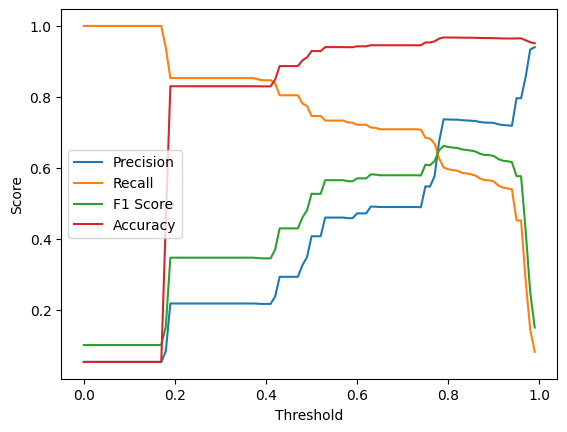

Best threshold for F1 score: 0.79


In [54]:
# Convert results to a NumPy array for easier processing
results = np.array(results)

# Plot the metrics for each threshold
plt.plot(results[:, 0], results[:, 1], label='Precision')
plt.plot(results[:, 0], results[:, 2], label='Recall')
plt.plot(results[:, 0], results[:, 3], label='F1 Score')
plt.plot(results[:, 0], results[:, 4], label='Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

# Find the threshold that maximizes the F1 score
best_threshold = results[np.argmax(results[:, 3]), 0]
print(f'Best threshold for F1 score: {best_threshold}')

In [55]:
plot_roc_auc(y_test, rf_y_pred_proba, title=f'Random Forest ROC Curve using known Data')

Without stratify: 0.8976

`auPRC` Area under the Precision-Recall Curve

In [56]:
plot_pr_curve(y_test, rf_y_pred_proba, f'Random Forest Precision-Recall Curve using known Data')

#### RF Validation using unseen data

In [57]:
df_validate = pd.read_csv("data/corona_tested_individuals_ver_0083.english.csv")

D:\tmp\ipykernel_18200\297791983.py:1: DtypeWarning:

Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.



In [58]:
# Preprocess the validation dataset
df_validate_filtered = filter(df_validate)
df_val_dummy = dummy(df_validate_filtered)

In [59]:
X_validate = df_val_dummy.drop(columns=["corona_result"])
y_validate = df_val_dummy["corona_result"]

In [60]:
rf_y_pred_validate = rf_model.predict(X_validate)
rf_validate_confusion_matrix = confusion_matrix(y_validate, rf_y_pred_validate)
plot_cf_matrix(rf_validate_confusion_matrix, f"Confusion Matrix for Random Forest Model using unseen Data")

In [61]:
y_validate_proba = rf_model.predict_proba(X_validate)[:, 1]
rf_pred_validate_with_custom_threshold = (y_validate_proba >= best_threshold).astype(int)
rf_validate_confusion_matrix_with_threshold = confusion_matrix(y_validate, rf_pred_validate_with_custom_threshold)
plot_cf_matrix(rf_validate_confusion_matrix_with_threshold, f"Confusion Matrix for Random Forest Model using unseen Data (Threshold: {best_threshold})")

In [62]:
print(classification_report(y_validate, rf_y_pred_validate))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96   2390508
           1       0.58      0.62      0.60    219681

    accuracy                           0.93   2610189
   macro avg       0.77      0.79      0.78   2610189
weighted avg       0.93      0.93      0.93   2610189



In [63]:
print(classification_report(y_validate, rf_pred_validate_with_custom_threshold))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96   2390508
           1       0.62      0.55      0.58    219681

    accuracy                           0.93   2610189
   macro avg       0.79      0.76      0.77   2610189
weighted avg       0.93      0.93      0.93   2610189



In [64]:
plot_roc_auc(y_validate, y_validate_proba, title=f'Random Forest ROC Curve using unseen Data')

In [65]:
plot_pr_curve(y_validate, y_validate_proba, f'Random Forest Precision-Recall Curve using unseen Data')

### LGB model

In [66]:
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_test = lgb.Dataset(X_test, label=y_test, reference=lgb_train)

In [67]:
params = {
    "num_leaves": 20,
    "min_data_in_leaf": 4,
    "feature_fraction": 0.2,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "learning_rate": 0.05,
    "verbose": 1,
    "num_boost_round": 603,
    "early_stopping_rounds": 5
}

lgb_model = lgb.train(
    params=params,
    train_set=lgb_train,
    valid_sets=[lgb_train, lgb_test]
)

d:\Codes\Python\Cambridge_spark\12_Hackathon\.env\Lib\site-packages\lightgbm\engine.py:204: UserWarning:

Found `num_boost_round` in params. Will use it instead of argument



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005556 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 16
[LightGBM] [Info] Number of data points in the train set: 204534, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 0.052930
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [68]:
lgb_pred_proba = lgb_model.predict(X_test)
lgb_pred = (lgb_pred_proba >= 0.5).astype(int)
lgb_confusion_matrix = confusion_matrix(y_test, lgb_pred)
plot_cf_matrix(lgb_confusion_matrix, f"Confusion Matrix for LGB Model using known Data")

In [69]:
plot_roc_auc(y_test, lgb_pred_proba, title=f'LGB ROC Curve using known Data')

In [70]:
plot_pr_curve(y_test, lgb_pred_proba, f'LGB Precision-Recall Curve using known Data')

#### LGB Validation using unseen data

In [71]:
lgb_y_pred_proba_validate = lgb_model.predict(X_validate)

In [72]:
lgb_pred_validate = (lgb_y_pred_proba_validate >= 0.5).astype(int)
lgb_validate_confusion_matrix = confusion_matrix(y_validate, lgb_pred_validate)
plot_cf_matrix(lgb_validate_confusion_matrix, f"Confusion Matrix for LGB Model using unseen Data")

In [104]:
print(classification_report(y_validate, lgb_pred_validate))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96   2390508
           1       0.62      0.56      0.59    219681

    accuracy                           0.93   2610189
   macro avg       0.79      0.77      0.78   2610189
weighted avg       0.93      0.93      0.93   2610189



In [73]:
plot_roc_auc(y_validate, lgb_y_pred_proba_validate, title=f'LGB ROC Curve using unseen Data')

In [74]:
plot_pr_curve(y_validate, lgb_y_pred_proba_validate, f'LGB Precision-Recall Curve using unseen Data')

In [75]:
positive_class_prevalence = y_validate.sum() / len(y_validate)
positive_class_prevalence

np.float64(0.08416287096451636)

## PCA for dimensionality reduction

In [98]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

In [79]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Target'] = y

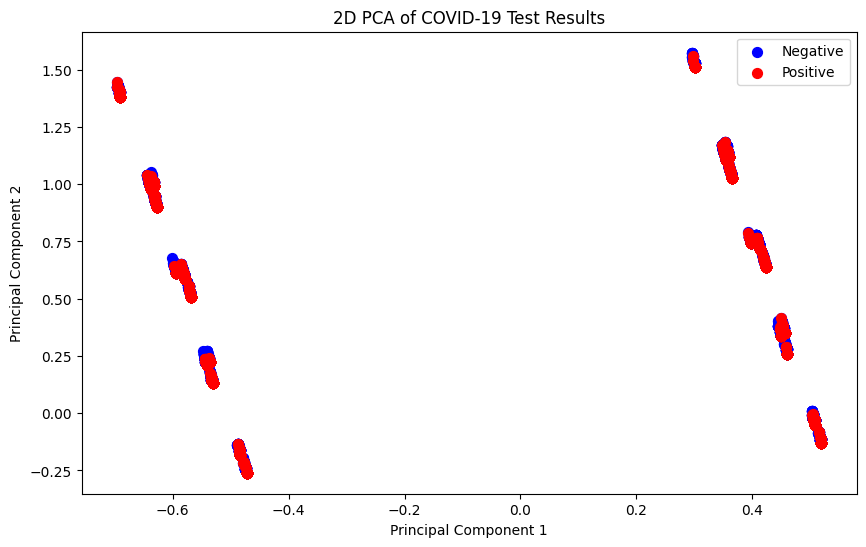

In [80]:
plt.figure(figsize=(10, 6))
for target, color in zip([0, 1], ['b', 'r']):
    indices_to_keep = pca_df['Target'] == target
    plt.scatter(pca_df.loc[indices_to_keep, 'PC1'], pca_df.loc[indices_to_keep, 'PC2'], c=color, s=50)
plt.legend(['Negative', 'Positive'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of COVID-19 Test Results')
plt.show()

In [81]:
X.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,gender,test_indication_Abroad,test_indication_Contact with confirmed
0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0


In [89]:
255668 / 5000

51.1336

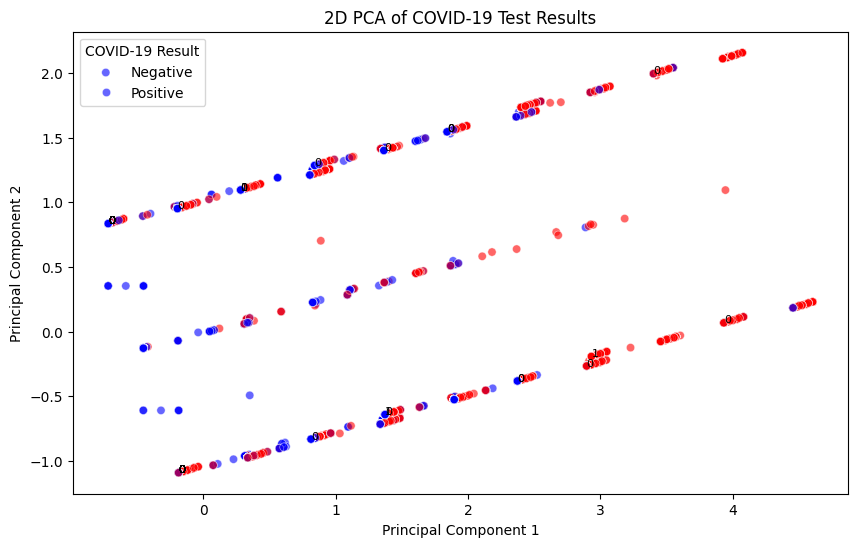

In [90]:
def plot_pca_covid(df, labels_col="corona_result"):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(df.drop(columns=[labels_col]))

    df['PC1'] = pca_result[:, 0]
    df['PC2'] = pca_result[:, 1]

    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=df,
        x='PC1', y='PC2',
        hue=labels_col,
        palette={0: 'blue', 1: 'red'},
        legend='full',
        alpha=0.6
    )
    
    plt.title('2D PCA of COVID-19 Test Results')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='COVID-19 Result', loc='best', labels=['Negative', 'Positive'])
    plt.show()

# Example usage
plot_pca_covid(df_filtered)

In [99]:
def plot_tsne_covid(df, labels_col="corona_result"):
    pca = PCA(n_components=5)
    pca_result = pca.fit_transform(df.drop(columns=[labels_col]))
    
    tsne = TSNE(n_components=2, perplexity=40, random_state=101)
    tsne_result = tsne.fit_transform(pca_result)
    
    df['TSNE1'] = tsne_result[:, 0]
    df['TSNE2'] = tsne_result[:, 1]
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=df,
        x='TSNE1', y='TSNE2',
        hue=labels_col,
        palette={0: 'blue', 1: 'red'},
        legend='full',
        alpha=0.6
    )
    
    # Adding annotations
    # for i in range(len(df)):
    #     plt.text(
    #         df['TSNE1'].iloc[i],
    #         df['TSNE2'].iloc[i],
    #         str(df[labels_col].iloc[i]),
    #         color='black',
    #         fontsize=8
    #     )
    
    plt.title('2D t-SNE of COVID-19 Test Results')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend(title='COVID-19 Result', loc='best', labels=['Negative', 'Positive'])
    plt.show()

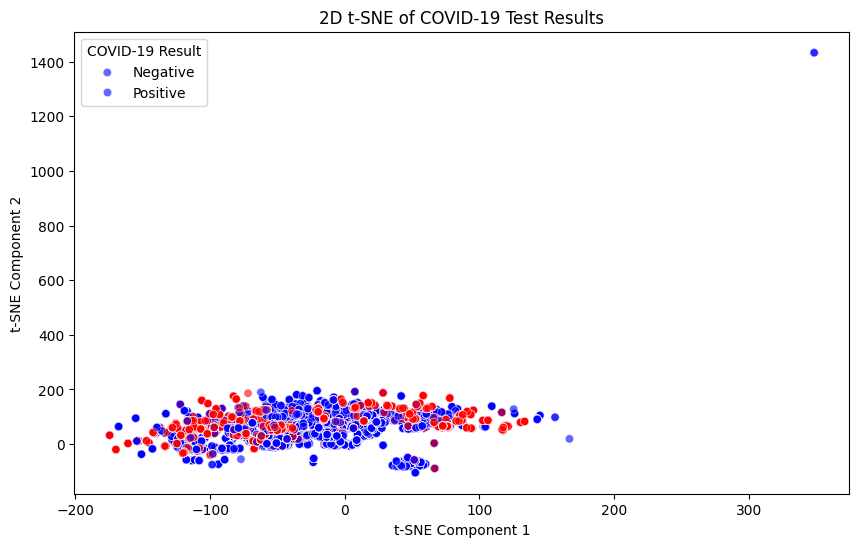

In [100]:
plot_tsne_covid(df_filtered)